### Ch6 Figure2

In [1]:
# The team then created the data reports. What the data showed was that most of the people were professionals who regularly placed several orders through their mobile devices. The orders they were placing in the call center were much smaller than the orders they placed through the mobile application. Around 80% of them were less than $20.

data=[]

for i in range(1000):
    if rd.random() > .5:
        channel='mobile'
    elif rd.random() > .7:
        channel='call'
    else:
        channel='fax'
    price=0
    if channel == 'mobile':
        if rd.random() > .2:
            category='organization'
            price=rd.random()*1000+5000
        elif rd.random() > .7:
            category='contractor'
            price=rd.random()*100+200
        else:
            category='individual'
            price=rd.random()*50+100
    elif channel == 'call':
        if rd.random() > .9:
            category='contractor'
            price=rd.random()*200+100
        else:
            category='individual'
            price=rd.random()*50+5
    # fax
    else:
        if rd.random() > .4:
            category='organization'
            price=rd.random()*1000+3000
        elif rd.random() > .6:
            category='contractor'
            price=rd.random()*300+300
        else:
            category='individual'
            price=rd.random()*10+50
    data.append([i, channel, category, price])

df = pd.DataFrame(data, columns=['id', 'channel', 'type', 'value'])
# df.to_csv('csv_output/ch6_fig2.csv', index=False)
df = pd.read_csv('csv_output/ch6_fig2.csv')
df.head()

,id,channel,type,value
0,0,mobile,organization,5276.826098
1,1,mobile,organization,5632.557994
2,2,call,contractor,270.780036
3,3,mobile,organization,5287.322853
4,4,mobile,organization,5630.575591


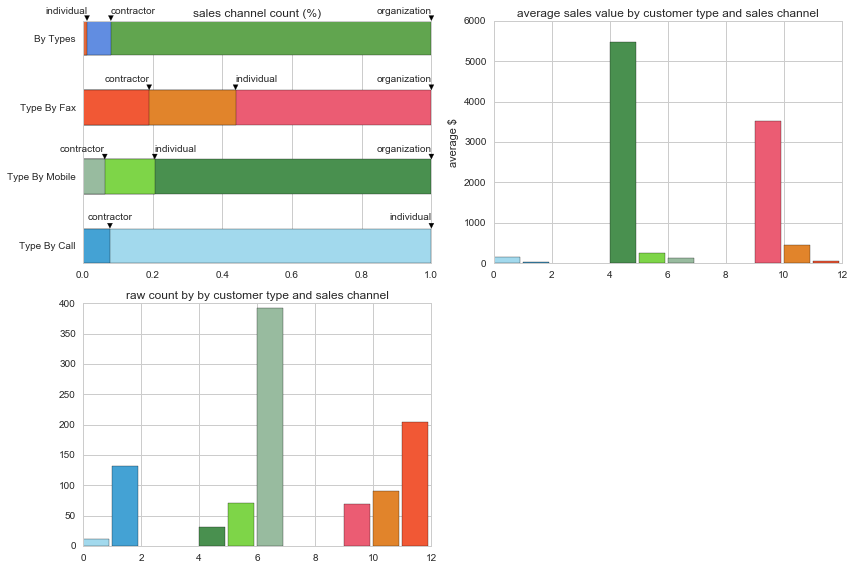

In [2]:
df = pd.read_csv('csv_output/ch6_fig2.csv')

%matplotlib inline
sns.set_style("whitegrid")

f, ax = plt.subplots(2,2, figsize=(12,8))

ax1 = ax[1][0]
ax2 = ax[0][1]
ax3 = ax[1][1]
ax = ax[0][0]

ax3.axis('off')

value_by_type = df.groupby('type').value.sum()/df.groupby('type').value.count()
value_by_type_stacked=value_by_type.sort_values(ascending=True)/sum(value_by_type)
value_by_type_stacked = value_by_type_stacked.cumsum().sort_values(ascending=False)
colors1=["#61a54f","#618de1","#e1683a","#b69039","#e15f72"]

# call
type_by_call = df.groupby(['channel', 'type']).id.count()['call']
type_by_call.sort_values(ascending=True,inplace=True)
type_by_call_stacked=type_by_call/sum(type_by_call)
type_by_call_stacked = type_by_call_stacked.cumsum().sort_values(ascending=False)


value_by_call = df.groupby(['channel', 'type']).value.mean()['call']
value_by_call_stacked = value_by_call.sort_values(ascending=False)/max(value_by_call)
blues=["#a2d9ed","#44a2d4","#80bad0","#60c9f4","#5994a8"]

# mobile
type_by_mobile = df.groupby(['channel', 'type']).id.count()['mobile']
type_by_mobile.sort_values(ascending=True,inplace=True)
type_by_mobile_stacked=type_by_mobile/sum(type_by_mobile)
type_by_mobile_stacked = type_by_mobile_stacked.cumsum().sort_values(ascending=False)

value_by_mobile = df.groupby(['channel', 'type']).value.mean()['mobile']
value_by_mobile.sort_values(ascending=False,inplace=True)
value_by_mobile_stacked = value_by_mobile/max(value_by_mobile)
greens=["#49904f","#7ed548","#98bb9f","#6eb227","#20b862"]

# fax
type_by_fax = df.groupby(['channel', 'type']).id.count()['fax']
type_by_fax.sort_values(ascending=True,inplace=True)
type_by_fax_stacked=type_by_fax/sum(type_by_fax)
type_by_fax_stacked = type_by_fax_stacked.cumsum().sort_values(ascending=False)

value_by_fax = df.groupby(['channel', 'type']).value.mean()['fax']
value_by_fax.sort_values(ascending=False,inplace=True)
value_by_fax_stacked = value_by_fax/max(value_by_fax)
reds=["#eb5c73","#e1842b","#f15835","#d49756","#e47e63"]

for x in range(3):
    
    # call
    if x <= (len(type_by_call_stacked)-1):
        ax.barh(bottom=0,width=type_by_call_stacked[x], color=blues[x], height=0.5)
        
        if x == 0:
            align = 'right'
        else:
            align = 'center'
        
        ax.annotate(type_by_call_stacked.index[x], xy=(type_by_call_stacked[x],0.5),  xycoords='data',
            xytext=(type_by_call_stacked[x], 0.21), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05, width=0, headwidth=5, headlength=5),
            horizontalalignment=align, verticalalignment='top',
            )
    
    # by type
    ax.barh(bottom=3,width=value_by_type_stacked[x], color=colors1[x], height=0.5)
    
    if x == 1:
        align = 'left'
    elif x == 2:
        align = 'right'
    else:
        align = 'right'
    
    ax.annotate(value_by_type_stacked.index[x], xy=(value_by_type_stacked[x],3.5),  xycoords='data',
        xytext=(value_by_type_stacked[x], 1.06), textcoords='axes fraction',
        arrowprops=dict(facecolor='black', shrink=0.05, width=0, headwidth=5, headlength=5),
        horizontalalignment=align, verticalalignment='top',
        )
    
    # mobile
    if x <= (len(type_by_mobile_stacked)-1):
        ax.barh(bottom=1,width=type_by_mobile_stacked[x], color=greens[x], height=0.5)
        ax.annotate(type_by_mobile_stacked.index[x], xy=(type_by_mobile_stacked[x],1.5),  xycoords='data',
            xytext=(type_by_mobile_stacked[x], 0.49), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05, width=0, headwidth=5, headlength=5),
            horizontalalignment=align, verticalalignment='top',
            )
    
    # fax
    if x <= (len(type_by_fax_stacked)-1):
        ax.barh(bottom=2,width=type_by_fax_stacked[x], color=reds[x], height=0.5)

        ax.annotate(type_by_fax_stacked.index[x], xy=(type_by_fax_stacked[x],2.5),  xycoords='data',
            xytext=(type_by_fax_stacked[x], .78), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05, width=0, headwidth=5, headlength=5),
            horizontalalignment=align, verticalalignment='top',
            )

ax.set_yticks([0.25,1.25,2.25,3.25])
ax.set_yticklabels(['Type By Call', 'Type By Mobile', 'Type By Fax', 'By Types'])
ax.set_title('sales channel count (%)')
        
ind=2
total=8
i = 0
for x in range(3):
    # call
    if x <= (len(type_by_call)-1):
        ax1.bar(height=type_by_call[x],left=x, width=.9, color=blues[x])
        ax2.bar(height=value_by_call[x],left=x, width=.9, color=blues[x])
    
i += len(type_by_call) + ind

for x in range(3):
    # by mobile
    ax1.bar(height=type_by_mobile[x], left=x+i, width=.9, color=greens[x])
    ax2.bar(height=value_by_mobile[x], left=x+i, width=.9, color=greens[x])

i += len(type_by_mobile) + ind
for x in range(3):
    # by fax
    ax1.bar(height=type_by_fax[x], left=x+i, width=.9, color=reds[x])
    ax2.bar(height=value_by_fax[x], left=x+i, width=.9, color=reds[x])

ax1.set_title('raw count by by customer type and sales channel');
ax2.set_title('average sales value by customer type and sales channel');
ax2.set_ylabel('average $')

f.tight_layout()
f.savefig('svg_output/ch6_fig2.svg', format='svg')

Most of the orders are placed by organization, however, most of the orders placed through calls are by individual. The average total value of an order placed through call by individual is the lowest across all.